### 📉 Training & Validation Loss Curve (UNet vs ViT)

이 그래프는 두 모델 **UNet3D**와 **ViT-UNet3D**의 학습 과정에서 나타난  
**Training Loss**와 **Validation Loss** 변화를 비교하여 모델의 수렴 특성과 일반화 성능을 확인하기 위한 것입니다.

**표현 방식**
- **UNet**
  - **Train:** 빨간 실선
  - **Validation:** 빨간 점선
- **ViT**
  - **Train:** 파란 실선
  - **Validation:** 파란 점선

**세로선(Vertical Line):**
- 각 모델이 **학습을 종료한 Step 위치**를 표시합니다.
- 선 옆에는 해당 모델의 **최종 Epoch 번호**가 함께 표시됩니다.

**해석 포인트**
1. **Train Loss가 감소**하면 모델은 데이터 패턴을 잘 학습하고 있는 것입니다.
2. **Validation Loss가 안정적 or 감소**하면 모델이 **일반화**되고 있음을 의미합니다.
3. **Validation Loss가 올라가면** → 과적합(overfitting) 가능성.
4. 두 모델 비교 시:
   - 초기 수렴 속도
   - 최종 Loss 값
   - Train vs Val 간의 갭 크기  
   등을 비교하여 **학습 안정성 및 일반화 성능 차이**를 판단할 수 있습니다.

이 그래프는 이후 모델 선택, 추가 학습 여부, 하이퍼파라미터 튜닝 방향(예: learning rate, batch size, augmentation) 등을 결정하는 데 중요한 근거가 됩니다.


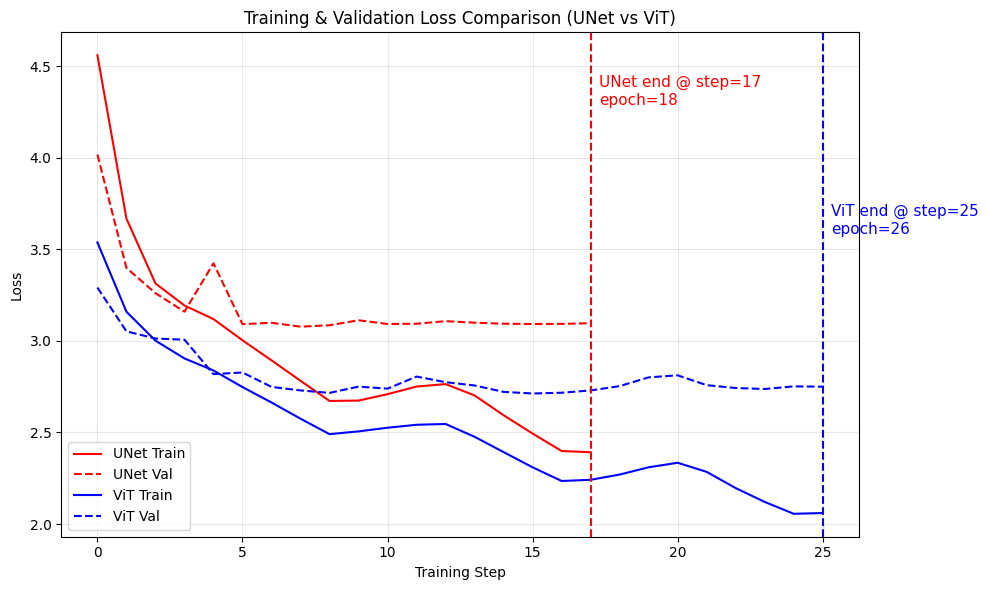

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# Load logs
# --------------------------
unet_log_path = "/home/mingyeong/GAL2DM_ASIM_VNET/results/vnet/icase-both/28845/icase-both-keep2_unet3d_tgt-rho_bs4_clr[1e-04-1e-03]_s42_smp100_log.csv"
vit_log_path  = "/home/mingyeong/GAL2DM_ASIM_ViT/results/vit/28846/icase-both_vitunet3d_tgt-rho_D128_ps8x8_st8x8_dim256_depth3_heads8_bs4_clr[1e-04-1e-03]_s42_smp100_log.csv"

df_unet = pd.read_csv(unet_log_path)
df_vit  = pd.read_csv(vit_log_path)

# --------------------------
# Normalize column names
# --------------------------
rename_map = {
    'train_loss': 'loss',
    'step_loss': 'loss',
    'valid_loss': 'val_loss',
    'validation_loss': 'val_loss',
    'lr': 'learning_rate',
    'epoch': 'epoch',
    'Epoch': 'epoch'
}
df_unet = df_unet.rename(columns=rename_map)
df_vit  = df_vit.rename(columns=rename_map)

# Fill missing val_loss if needed
if 'val_loss' not in df_unet: df_unet['val_loss'] = None
if 'val_loss' not in df_vit:  df_vit['val_loss']  = None

# --------------------------
# Determine end steps and epochs
# --------------------------
end_step_unet = len(df_unet) - 1
end_step_vit  = len(df_vit) - 1

epoch_unet = int(df_unet['epoch'].iloc[-1]) if 'epoch' in df_unet.columns else '-'
epoch_vit  = int(df_vit['epoch'].iloc[-1]) if 'epoch' in df_vit.columns else '-'

# --------------------------
# Plot
# --------------------------
plt.figure(figsize=(10,6))

# UNet (red)
plt.plot(df_unet['loss'],     color="red",   linestyle="-",  label="UNet Train")
plt.plot(df_unet['val_loss'], color="red",   linestyle="--", label="UNet Val")

# ViT (blue)
plt.plot(df_vit['loss'],      color="blue",  linestyle="-",  label="ViT Train")
plt.plot(df_vit['val_loss'],  color="blue",  linestyle="--", label="ViT Val")

# --------------------------
# Vertical lines for both final steps
# --------------------------
plt.axvline(end_step_unet, color="red", linestyle="--", linewidth=1.5)
plt.axvline(end_step_vit,  color="blue", linestyle="--", linewidth=1.5)

# Text annotations next to each vertical line
ylim_top = plt.ylim()[1]

plt.text(end_step_unet + 0.3, ylim_top*0.95,
         f"UNet end @ step={end_step_unet}\nepoch={epoch_unet}",
         color="red", fontsize=11, va='top')

plt.text(end_step_vit + 0.3, ylim_top*0.80,
         f"ViT end @ step={end_step_vit}\nepoch={epoch_vit}",
         color="blue", fontsize=11, va='top')

# --------------------------
# Formatting
# --------------------------
plt.title("Training & Validation Loss Comparison (UNet vs ViT)")
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

